https://srprinz.github.io/CMPS3160_Final/

https://github.com/srprinz/CMPS3160_Final

&emsp;&emsp;For our Final Tutorial, I, Annie Donahue, and Shay Prinz, will be working together. We are planning on working with 911 call data from the years 2019 and 2020, and possibly looking backwards to earlier years if it seems necessary, or if we have the time. We would like to manipulate this data to be able to see how different events/phenomena affect either peoples’ ability to call 911, or their willingness to. 

&emsp;&emsp;For example, we would like to see what the data can tell us about pre-COVID19 911 calls, vs. post COVID19, by comparing the data February of 2020 with May of 2020, and then using February and May 2019 as a control factor to see if anything changed. We were also thinking about looking at the 911 call data during times of civil unrest where there was a prominent anti-police sentiment in the U.S. Right now, for example, it would be interesting to see if less people are calling the police as protests calling for police abolishment continue across the country. This data can tell us a lot about the current state of New Orleans as a whole as we will be able to see both crime reporting data and 911 calls related to health issues. These datasets encompass a lot of information, and it may be difficult to filter it in a way that will be easier and more digestible so as to see the true effects of the various events we are trying to center our analysis around.
    
&emsp;&emsp;A specific challenge Shay came across when transforming the data was converting from string to datetime. Due to how large this dataset is, it was taking over 10 minutes to complete the conversion. This is because pandas uses dateutil.parser.parse for parsing the strings when it has a non-default format or when no format string is supplied. I was able to speed up the process a bit by adding the parameter "infer_datetime_format=True".
    
&emsp;&emsp;We are planning on meeting once a week as a starting point, so as to gauge how much we can get done in one sitting, and make sure we are on a good pace to be able to complete our tutorial in the semester. If need be, we will move up to meeting multiple times a week, especially as we get closer to the end of the semester. Mostly, we will be completing our work on GitHub, and then using the weekly meeting to make a timeline for the next week, and set goals and checkpoints to accomplish before the next time we meet, as well as check in on each others progress and make sure our code and our analyses are compatible. 
    
&emsp;&emsp;We would like to plan at least one big goal to accomplish for each week, which is a hard deadline for us both, as well as a stretch goal that we would ideally get done before the next week, but could be moved up to the next week if it became clear that we didn’t have enough time during that week. This is so as to keep us on a steady track, but also work with both of our busy schedules is knowing that there are some weeks where we may have more time and be able to get  larger bulk of things done, but even in our busier weeks, we would have to get the set goal done, keeping us on a steady movement towards completing the project. Ideally, our weeks will work around Thursdays, as since we are in the service learning portion of the class, we would like to be able to check in during those times with updates to our service learning partner and our class. 



This dataset reflects incidents that have been reported to the New Orleans Police Department in 2019. Data is provided by Orleans Parish Communication District (OPCD), the administrative office of 9-1-1 for the City of New Orleans.

In [1]:
import pandas as pd
#set 'Beat' column dtype to object to avoid mixed dtypes in column
Calls2019_df = pd.read_csv("../Calls_for_Service_2019.csv",low_memory=False)

In [2]:
#Tidy data by dropping columns that won't be used (NOPD_Item, MapX, MapY, TimeClosed, Beat, Location)
del Calls2019_df['NOPD_Item']
del Calls2019_df['MapX']
del Calls2019_df['MapY']
del Calls2019_df['TimeClosed']
del Calls2019_df['Beat']
del Calls2019_df['Location']

In [3]:
#Calls2019_df.dtypes
#Convert TimeCreate, TimeDispatch, and TimeArrival to datetime
Calls2019_df['TimeCreate'] = pd.to_datetime(Calls2019_df['TimeCreate'],infer_datetime_format=True)
Calls2019_df['TimeDispatch'] = pd.to_datetime(Calls2019_df['TimeDispatch'],infer_datetime_format=True)
Calls2019_df['TimeArrival'] = pd.to_datetime(Calls2019_df['TimeArrival'],infer_datetime_format=True)

#replace missing data
Calls2019_df

,Type,TypeText,Priority,TimeCreate,TimeDispatch,TimeArrival,Disposition,DispositionText,InitialType,InitialTypeText,InitialPriority,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict
0,58,RETURN FOR ADDITIONAL INFO,1I,2019-03-28 13:11:19,2019-03-28 13:11:19,NaT,NAT,Necessary Action Taken,58,RETURN FOR ADDITIONAL INFO,1I,N,N Galvez St & Conti St,70119,1
1,62L,"BURGLAR ALARM, LOCAL",2D,2019-03-28 17:02:07,2019-03-28 17:05:16,NaT,NAT,Necessary Action Taken,62L,"BURGLAR ALARM, LOCAL",2D,N,020XX Canal St,70112,1
2,22A,AREA CHECK,1K,2019-03-08 15:50:25,2019-03-08 15:50:25,2019-03-08 15:50:30,NAT,Necessary Action Taken,22A,AREA CHECK,1K,N,Catina St & Robert E Lee Blvd,70124,3
3,21,COMPLAINT OTHER,1J,2019-03-28 18:52:04,NaT,NaT,VOI,VOID,63,PROWLER,2E,N,001XX N Dorgenois St,70119,1
4,62C,SIMPLE BURGLARY VEHICLE,1G,2019-03-28 15:54:27,2019-03-28 16:18:37,NaT,RTF,REPORT TO FOLLOW,62C,SIMPLE BURGLARY VEHICLE,1G,N,005XX Soraparu St,70130,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487357,103,DISTURBANCE (OTHER),1C,2020-03-30 13:54:14,2020-03-30 14:04:46,2020-03-30 14:08:27,NAT,Necessary Action Taken,103,DISTURBANCE (OTHER),1C,N,Benefit St & Elysian Fields Ave,70122,3
487358,911,SILENT 911 CALL,2F,2020-03-30 14:46:20,2020-03-30 14:49:50,NaT,NAT,Necessary Action Taken,911,SILENT 911 CALL,2F,N,011XX N Tonti St,70119,1
487359,103F,FIGHT,2D,2020-03-30 15:16:45,2020-03-30 15:17:55,2020-03-30 15:21:02,GOA,GONE ON ARRIVAL,103F,FIGHT,2D,N,002XX Blk Esplanade Ave,70119,1
487360,103,DISTURBANCE (OTHER),1C,2020-03-30 15:49:30,2020-03-30 15:52:52,NaT,VOI,VOID,103,DISTURBANCE (OTHER),1C,N,042XX Chef Menteur Hwy,70126,3


This dataset reflects incidents that have been reported to the New Orleans Police Department in 2020. Data is provided by Orleans Parish Communication District (OPCD), the administrative office of 9-1-1 for the City of New Orleans.

In [4]:
Calls2020_df = pd.read_csv("../Call_for_Service_2020.csv")

In [5]:
#Tidy data by dropping columns that won't be used (NOPD_Item, MapX, MapY, TimeClosed, Beat, Location)
del Calls2020_df['NOPD_Item']
del Calls2020_df['MapX']
del Calls2020_df['MapY']
del Calls2020_df['TimeClosed']
del Calls2020_df['Beat']
del Calls2020_df['Location']

In [6]:
#Calls2019_df.dtypes
#Convert TimeCreate, TimeDispatch, and TimeArrive to datetime
Calls2020_df['TimeCreate'] = pd.to_datetime(Calls2020_df['TimeCreate'],infer_datetime_format=True)
Calls2020_df['TimeDispatch'] = pd.to_datetime(Calls2020_df['TimeDispatch'],infer_datetime_format=True)
Calls2020_df['TimeArrive'] = pd.to_datetime(Calls2020_df['TimeArrive'],infer_datetime_format=True)

#replace missing data
Calls2020_df

,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,Disposition,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict
0,94F,FIREWORKS,1A,103,DISTURBANCE (OTHER),1C,2020-01-01 00:00:34,2020-01-01 02:34:18,NaT,NAT,Necessary Action Taken,N,001XX Blk Riviera Ave,70122,3
1,21,COMPLAINT OTHER,1J,21,COMPLAINT OTHER,1J,2020-01-01 00:00:42,2020-01-01 00:00:42,2020-01-01 00:00:42,NAT,Necessary Action Taken,Y,034XX Broadway St,70125,2
2,94F,FIREWORKS,1A,94F,FIREWORKS,2J,2020-01-01 00:01:05,2020-01-01 01:49:42,2020-01-01 02:08:17,NAT,Necessary Action Taken,N,026XX Banks St,70119,1
3,94,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,2020-01-01 00:02:50,2020-01-01 00:02:54,2020-01-01 00:09:13,GOA,GONE ON ARRIVAL,N,Kerlerec St & N Robertson St,70116,1
4,94F,FIREWORKS,1A,94F,FIREWORKS,2J,2020-01-01 00:03:46,2020-01-01 00:34:36,NaT,NAT,Necessary Action Taken,N,053XX Memphis St,70124,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309526,62A,"BURGLAR ALARM, SILENT",2E,62A,"BURGLAR ALARM, SILENT",2E,2020-09-16 06:55:41,2020-09-16 06:57:24,2020-09-16 07:01:49,NAT,Necessary Action Taken,N,027XX Verbena St,70122,3
309527,22A,AREA CHECK,1K,22A,AREA CHECK,1K,2020-09-16 15:29:32,2020-09-16 15:29:32,2020-09-16 15:29:47,NAT,Necessary Action Taken,N,007XX Canal St,70130,8
309528,21,COMPLAINT OTHER,2A,911,SILENT 911 CALL,2F,2020-09-16 20:12:48,2020-09-16 20:14:57,2020-09-16 20:17:39,GOA,GONE ON ARRIVAL,N,S Carrollton Ave & Tulane Ave,70119,1
309529,22A,AREA CHECK,1K,22A,AREA CHECK,1K,2020-09-16 05:25:06,2020-09-16 05:25:06,2020-09-16 05:25:06,NAT,Necessary Action Taken,Y,Basin St & Crozat St,70112,1


A challenge I came across when transforming the data was converting from string to datetime.  Due to how large this dataset is, it was taking over 10 minutes to complete the conversion.  This is because pandas uses dateutil.parser.parse for parsing the strings when it has a non-default format or when no format string is supplied. I was able to speed up the process a bit by adding the parameter "infer_datetime_format=True".

#### Graph for proportion of calls in March 2019 vs March 2020

In [7]:
#Create new dataframe with only incidents from March 2019
CallsMarch2019 = Calls2019_df[Calls2019_df['TimeCreate'].dt.month == 3]
#Create new dataframe with only incidents from March 2020
CallsMarch2020  = Calls2020_df[Calls2020_df['TimeCreate'].dt.month == 3]

In [8]:
#get proportion of calls made in March 2019 
propMarch2019 = len(CallsMarch2019)/len(Calls2019_df)

In [9]:
#get proportion of calls made in March 2020 
propMarch2020 = len(CallsMarch2020)/len(Calls2020_df)

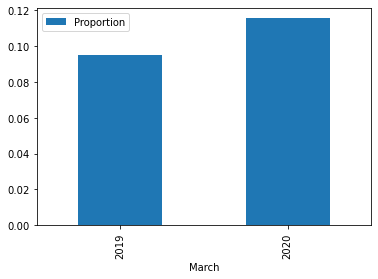

In [10]:
data = {'March':['2019','2020'], 'Proportion' :[propMarch2019, propMarch2020]}
propMarch_df = pd.DataFrame(data) 
propMarch_df = propMarch_df.set_index('March')
propMarch_df.plot.bar()

#### Graph for proportion of calls in August 2019 vs August 2020

In [11]:
#Create new dataframe with only incidents from August 2019
CallsAugust2019 = Calls2019_df[Calls2019_df['TimeCreate'].dt.month == 8]
#Create new dataframe with only incidents from August 2020
CallsAugust2020 = Calls2020_df[Calls2020_df['TimeCreate'].dt.month == 8]

In [12]:
#get proportion of calls made in August 2019
propAugust2019 = len(CallsAugust2019)/len(Calls2019_df)

In [13]:
#get proportion of calls made in August 2020
propAugust2020 = len(CallsAugust2020)/len(Calls2020_df)

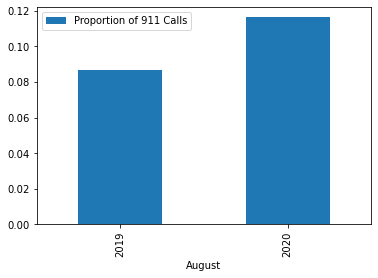

In [14]:
data = {'August':['2019', '2020'], 
        'Proportion of 911 Calls' :[propAugust2019, propAugust2020]}
propAugust_df = pd.DataFrame(data) 
propAugust_df = propAugust_df.set_index('August')
propAugust_df.plot.bar()

#### Graph top 5 types of calls in 2019

In [15]:
Calls2019_df['InitialTypeText'].value_counts()

AREA CHECK                  82318
COMPLAINT OTHER             59285
DISTURBANCE (OTHER)         29239
TRAFFIC INCIDENT            24713
BURGLAR ALARM, SILENT       22667
                            ...  
UNLAWFUL SALES TO MINORS        1
RIOT                            1
SIMPLE BURGLARY DOMESTIC        1
AUTO SMASH & GRAB               1
IMPERSONATING AN OFFICER        1
Name: InitialTypeText, Length: 169, dtype: int64

In [50]:
MostCommonCalls2019 = Calls2019_df['TypeText'].value_counts().nlargest(5)

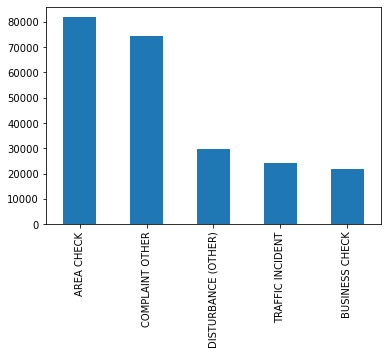

In [51]:
MostCommonCalls2019.plot(kind='bar')

In [52]:
MostCommonCalls2020 = Calls2020_df['TypeText'].value_counts().nlargest(5)

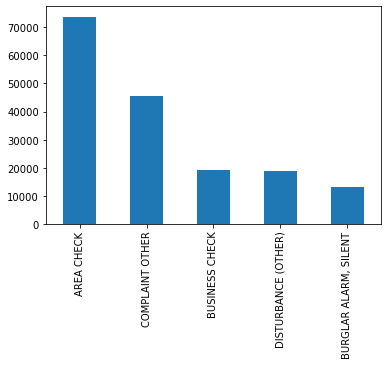

In [53]:
MostCommonCalls2020.plot(kind='bar')